# **Regresiones por distritos - modelo con más logs**

# 1. Importamos los paquetes y los datos necesarios

### *Paquetes*

Importar paquetes.

In [1]:
import pandas as pd
import numpy as np
import statsmodels.api as sm

### *Datos*

Importamos los datos en dos DataFrames, uno para cada tipo de vivienda. Son los datos a nivel de **distrito**.

In [2]:
df_noBCN_VC = pd.read_csv('/Users/pablo/Desktop/Drive pablo.fdzalb/6o curso/TFG economía/Datos/Regresiones - Modelos/Datasets/df_noBCN_VC.csv')

df_noBCN_VU = pd.read_csv('/Users/pablo/Desktop/Drive pablo.fdzalb/6o curso/TFG economía/Datos/Regresiones - Modelos/Datasets/df_noBCN_VU.csv')

In [3]:
df_noBCN_VC

,Unnamed: 0,CPRO,LITPRO,CUMUN,LITMUN,CUDIS,ALQM2mes_LV_M_VC_21,time_pub_trans,time_priv_trans,str_line_dist,...,unemployment_rate,has_tram,has_metro,has_rodalies,has_fgc,pop_density,industrial_waste,population_growth,new_houses,mob_estud
0,0,8,Barcelona,8015,Badalona,801501,9.510514,27,40,9.63,...,0.081458,0,1,1,0,10529.1,15748.85,-0.130000,3.2,0.891922
1,1,8,Barcelona,8015,Badalona,801502,9.259259,34,35,9.55,...,0.139621,0,1,1,0,10529.1,15748.85,0.054602,3.2,0.891922
2,2,8,Barcelona,8015,Badalona,801503,10.512800,28,35,8.43,...,0.092935,1,1,0,0,10529.1,15748.85,0.151405,3.2,0.891922
3,3,8,Barcelona,8015,Badalona,801504,9.331875,41,40,10.18,...,0.114213,0,0,0,0,10529.1,15748.85,0.022071,3.2,0.891922
4,4,8,Barcelona,8015,Badalona,801505,9.523810,33,40,10.16,...,0.087060,0,1,1,0,10529.1,15748.85,0.100403,3.2,0.891922
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
109,109,8,Barcelona,8245,Santa Coloma de Gramenet,824506,8.841814,29,35,8.03,...,0.190450,0,1,0,0,17041.3,2348.38,0.242798,0.3,0.855187
110,110,8,Barcelona,8282,Tiana,828201,9.935488,44,40,13.01,...,0.073831,0,0,0,0,1133.2,3352.41,0.124611,13.4,0.531646
111,111,8,Barcelona,8289,Torrelles de Llobregat,828901,8.593750,57,55,16.43,...,0.084045,0,0,0,0,451.8,92.40,0.081449,0.3,0.591304
112,112,8,Barcelona,8301,Viladecans,830101,9.368233,36,40,14.69,...,0.115896,0,0,1,0,3270.0,4535.18,0.045445,1.6,0.850964


Aquí pondremos en logs los ***precios, avg_inc_hh y pop_density. Haré la ratio entre rented_houses_mitma y population (/100)***.

La variable *ratio_rented_houses_population* tiene la siguiente interpretación: es el número de viviendas en alquiler (según los datos del MITMA) cada 100 habitantes, por distrito. De esta manera, representará mejor cuál es la oferta en cada distrito (ya que ni la población ni *rented_houses_mitma* aportaban ninguna información especialmente interesante por sí solas).

In [4]:
# Quitamos una columna que no sé qué pinta
df_noBCN_VC = df_noBCN_VC.drop(labels = ['Unnamed: 0', 'CPRO', 'LITPRO'], axis = 1)

# Añado una columna con los precios, avg_inc_hh y pop_density en logs
df_noBCN_VC['log_ALQM2mes_LV_M_VC_21'] = np.log(df_noBCN_VC['ALQM2mes_LV_M_VC_21'])
df_noBCN_VC['log_avg_inc_hh'] = np.log(df_noBCN_VC['avg_inc_hh'])
df_noBCN_VC['log_pop_density'] = np.log(df_noBCN_VC['pop_density'])
# Hago una ratio de casas alquiladas / población
df_noBCN_VC['ratio_rented_houses_population'] = df_noBCN_VC['rented_houses_mitma'] / (df_noBCN_VC['population'] / 100)

df_noBCN_VC

,CUMUN,LITMUN,CUDIS,ALQM2mes_LV_M_VC_21,time_pub_trans,time_priv_trans,str_line_dist,has_beach,has_parks,parks_surface,...,has_fgc,pop_density,industrial_waste,population_growth,new_houses,mob_estud,log_ALQM2mes_LV_M_VC_21,log_avg_inc_hh,log_pop_density,ratio_rented_houses_population
0,8015,Badalona,801501,9.510514,27,40,9.63,1,0,95210.00,...,0,10529.1,15748.85,-0.130000,3.2,0.891922,2.252398,10.782139,9.261898,8.930150
1,8015,Badalona,801502,9.259259,34,35,9.55,0,0,95210.00,...,0,10529.1,15748.85,0.054602,3.2,0.891922,2.225624,10.501939,9.261898,6.307085
2,8015,Badalona,801503,10.512800,28,35,8.43,1,0,95210.00,...,0,10529.1,15748.85,0.151405,3.2,0.891922,2.352594,10.690694,9.261898,6.250324
3,8015,Badalona,801504,9.331875,41,40,10.18,0,1,99372.00,...,0,10529.1,15748.85,0.022071,3.2,0.891922,2.233436,10.580251,9.261898,4.174383
4,8015,Badalona,801505,9.523810,33,40,10.16,1,1,95210.00,...,0,10529.1,15748.85,0.100403,3.2,0.891922,2.253795,10.706341,9.261898,5.816701
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
109,8245,Santa Coloma de Gramenet,824506,8.841814,29,35,8.03,0,0,81324.00,...,0,17041.3,2348.38,0.242798,0.3,0.855187,2.179492,10.210494,9.743395,5.973491
110,8282,Tiana,828201,9.935488,44,40,13.01,0,1,61994.93,...,0,1133.2,3352.41,0.124611,13.4,0.531646,2.296113,10.960618,7.032801,4.686981
111,8289,Torrelles de Llobregat,828901,8.593750,57,55,16.43,0,0,12979.00,...,0,451.8,92.40,0.081449,0.3,0.591304,2.151035,10.757775,6.113240,5.505636
112,8301,Viladecans,830101,9.368233,36,40,14.69,1,1,54636.29,...,0,3270.0,4535.18,0.045445,1.6,0.850964,2.237325,10.584512,8.092545,5.292815


In [5]:
# Quitamos una columna que no sé qué pinta
df_noBCN_VU = df_noBCN_VU.drop(labels = ['Unnamed: 0', 'CPRO', 'LITPRO'], axis = 1)

# Añado una columna con los precios, avg_inc_hh y pop_density en logs
df_noBCN_VU['log_ALQM2mes_LV_M_VU_21'] = np.log(df_noBCN_VU['ALQM2mes_LV_M_VU_21'])
df_noBCN_VU['log_avg_inc_hh'] = np.log(df_noBCN_VU['avg_inc_hh'])
df_noBCN_VU['log_pop_density'] = np.log(df_noBCN_VU['pop_density'])
# Hago una ratio de casas alquiladas / población
df_noBCN_VU['ratio_rented_houses_population'] = df_noBCN_VU['rented_houses_mitma'] / (df_noBCN_VU['population'] / 100)

df_noBCN_VU

,CUMUN,LITMUN,CUDIS,ALQM2mes_LV_M_VU_21,time_pub_trans,time_priv_trans,str_line_dist,has_beach,has_parks,parks_surface,...,has_fgc,pop_density,industrial_waste,population_growth,new_houses,mob_estud,log_ALQM2mes_LV_M_VU_21,log_avg_inc_hh,log_pop_density,ratio_rented_houses_population
0,8015,Badalona,801501,6.336940,27,40,9.63,1,0,95210.00,...,0,10529.1,15748.85,-0.130000,3.2,0.891922,1.846396,10.782139,9.261898,8.930150
1,8015,Badalona,801502,5.102041,34,35,9.55,0,0,95210.00,...,0,10529.1,15748.85,0.054602,3.2,0.891922,1.629641,10.501939,9.261898,6.307085
2,8015,Badalona,801503,4.153728,28,35,8.43,1,0,95210.00,...,0,10529.1,15748.85,0.151405,3.2,0.891922,1.424006,10.690694,9.261898,6.250324
3,8015,Badalona,801504,7.817114,41,40,10.18,0,1,99372.00,...,0,10529.1,15748.85,0.022071,3.2,0.891922,2.056315,10.580251,9.261898,4.174383
4,8015,Badalona,801505,5.223990,33,40,10.16,1,1,95210.00,...,0,10529.1,15748.85,0.100403,3.2,0.891922,1.653261,10.706341,9.261898,5.816701
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85,8245,Santa Coloma de Gramenet,824506,5.691869,29,35,8.03,0,0,81324.00,...,0,17041.3,2348.38,0.242798,0.3,0.855187,1.739039,10.210494,9.743395,5.973491
86,8282,Tiana,828201,7.389119,44,40,13.01,0,1,61994.93,...,0,1133.2,3352.41,0.124611,13.4,0.531646,2.000009,10.960618,7.032801,4.686981
87,8289,Torrelles de Llobregat,828901,6.646586,57,55,16.43,0,0,12979.00,...,0,451.8,92.40,0.081449,0.3,0.591304,1.894103,10.757775,6.113240,5.505636
88,8301,Viladecans,830101,5.357430,36,40,14.69,1,1,54636.29,...,0,3270.0,4535.18,0.045445,1.6,0.850964,1.678484,10.584512,8.092545,5.292815


# 2. Función para realizar las regresiones

Ahora voy a crear una función para hacer más rápidamente las regresiones. 

Para controlar heteroskedasticity-robust standard errors, hay un parámetro de OLS.fit() que se llama "cov_type" (https://www.statsmodels.org/stable/generated/statsmodels.regression.linear_model.RegressionResults.html) que puede tomar, como valor, HC3 ("MacKinnon and White's (1985) heteroskedasticity robust standard errors").

In [6]:
# Función para hacer una regresión con los heteroskedasticity-robust standard errors
# Inputs:
## y = dependent variable
## x = list of explanatory variables
## df = DataFrame used for the regression

def lr(y, x, df):
    # First, we define the formula that will be used in the regression. We will construct it dynamically
    formula = f"{y} ~ {' + '.join(x)}"
    model = sm.OLS.from_formula(formula, data = df)
    results = model.fit(cov_type = 'HC3')
    print(results.summary())

# 3. Wrapper methods - machine learning
Now I will use some wrapper methods for feature selection in order to choose a smaller number of features.

In [7]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from matplotlib import pyplot as plt

## a. *Standardizing the data*

First, we need to standardize the data. I will not standardize the dummy variables, which already are on a consistent scale (0 or 1). I have looked to several resources which advise against standardizing dummy variables, even if they're to be provided to a machine learning model: https://stats.stackexchange.com/questions/59392/should-you-ever-standardise-binary-variables; https://www.researchgate.net/post/Can_we_standardize_normalize_categorical_variables; https://stackoverflow.com/questions/50557129/dummy-variables-is-necessary-to-standardize-them; https://www.quora.com/How-bad-is-it-to-standardize-dummy-variables

Therefore, below I will standardize only the quantitative variables.

In [8]:
print(df_noBCN_VC.columns)

Index(['CUMUN', 'LITMUN', 'CUDIS', 'ALQM2mes_LV_M_VC_21', 'time_pub_trans',
       'time_priv_trans', 'str_line_dist', 'has_beach', 'has_parks',
       'parks_surface', 'pt_lines', 'avg_inc_hh', 'ibi_urb', 'ibi_rur',
       'cat_update', 'vpo', 'rented_houses_mitma', 'population',
       'foreign_born_rate', 'superior_studies_rate', 'unemployment_rate',
       'has_tram', 'has_metro', 'has_rodalies', 'has_fgc', 'pop_density',
       'industrial_waste', 'population_growth', 'new_houses', 'mob_estud',
       'log_ALQM2mes_LV_M_VC_21', 'log_avg_inc_hh', 'log_pop_density',
       'ratio_rented_houses_population'],
      dtype='object')


In [9]:
# COLLECTIVE DWELLINGS

quant_variables_VC = list(df_noBCN_VC.columns[4:-1])
# Eliminamos las dummies de la lista de variables cuantitativas
quant_variables_VC.remove('has_beach')
quant_variables_VC.remove('has_parks')
quant_variables_VC.remove('has_tram')
quant_variables_VC.remove('has_metro')
quant_variables_VC.remove('has_rodalies')
quant_variables_VC.remove('has_fgc')
# Eliminamos las variables que no han sido transformadas y que no utilizaremos
quant_variables_VC.remove('population')
quant_variables_VC.remove('avg_inc_hh')
quant_variables_VC.remove('pop_density')
quant_variables_VC.remove('rented_houses_mitma')
# Eliminamos la variable dependiente de la lista
quant_variables_VC.remove('log_ALQM2mes_LV_M_VC_21')
# Eliminamos cat_update, que no proporciona ninguna información relevante
quant_variables_VC.remove('cat_update')
# Añadimos la última columna
quant_variables_VC.append('ratio_rented_houses_population')

# SINGLE-FAMILY DWELLINGS

quant_variables_VU = list(df_noBCN_VU.columns[4:-1])
# Eliminamos las dummies de la lista de variables cuantitativas
quant_variables_VU.remove('has_beach')
quant_variables_VU.remove('has_parks')
quant_variables_VU.remove('has_tram')
quant_variables_VU.remove('has_metro')
quant_variables_VU.remove('has_rodalies')
quant_variables_VU.remove('has_fgc')
# Eliminamos las variables que no han sido transformadas y que no utilizaremos
quant_variables_VU.remove('population')
quant_variables_VU.remove('avg_inc_hh')
quant_variables_VU.remove('pop_density')
quant_variables_VU.remove('rented_houses_mitma')
# Eliminamos la variable dependiente de la lista
quant_variables_VU.remove('log_ALQM2mes_LV_M_VU_21')
# Eliminamos cat_update, que no proporciona ninguna información relevante
quant_variables_VU.remove('cat_update')
# Añadimos la última columna
quant_variables_VU.append('ratio_rented_houses_population')

print(quant_variables_VC)
print(quant_variables_VU)

print(len(quant_variables_VC))
print(len(quant_variables_VU))
# Everything is okay, there are 18 explanatory variables in each list (26 explanatory variables - 6 dummies - 1 variable lost with ratio_rented_houses_population - cat_update)

['time_pub_trans', 'time_priv_trans', 'str_line_dist', 'parks_surface', 'pt_lines', 'ibi_urb', 'ibi_rur', 'vpo', 'foreign_born_rate', 'superior_studies_rate', 'unemployment_rate', 'industrial_waste', 'population_growth', 'new_houses', 'mob_estud', 'log_avg_inc_hh', 'log_pop_density', 'ratio_rented_houses_population']
['time_pub_trans', 'time_priv_trans', 'str_line_dist', 'parks_surface', 'pt_lines', 'ibi_urb', 'ibi_rur', 'vpo', 'foreign_born_rate', 'superior_studies_rate', 'unemployment_rate', 'industrial_waste', 'population_growth', 'new_houses', 'mob_estud', 'log_avg_inc_hh', 'log_pop_density', 'ratio_rented_houses_population']
18
18


In [10]:
dummy_variables = ['has_beach', 'has_parks', 'has_tram', 'has_metro', 'has_rodalies', 'has_fgc']
# I have entered them in the same order as they are in the DataFrames

Then, the list below will have the feature names **in the order they have been introduced to the regression model below**.

In [11]:
print(quant_variables_VC + dummy_variables)
print(quant_variables_VU + dummy_variables)

print(len(quant_variables_VC + dummy_variables))
print(len(quant_variables_VU + dummy_variables))

['time_pub_trans', 'time_priv_trans', 'str_line_dist', 'parks_surface', 'pt_lines', 'ibi_urb', 'ibi_rur', 'vpo', 'foreign_born_rate', 'superior_studies_rate', 'unemployment_rate', 'industrial_waste', 'population_growth', 'new_houses', 'mob_estud', 'log_avg_inc_hh', 'log_pop_density', 'ratio_rented_houses_population', 'has_beach', 'has_parks', 'has_tram', 'has_metro', 'has_rodalies', 'has_fgc']
['time_pub_trans', 'time_priv_trans', 'str_line_dist', 'parks_surface', 'pt_lines', 'ibi_urb', 'ibi_rur', 'vpo', 'foreign_born_rate', 'superior_studies_rate', 'unemployment_rate', 'industrial_waste', 'population_growth', 'new_houses', 'mob_estud', 'log_avg_inc_hh', 'log_pop_density', 'ratio_rented_houses_population', 'has_beach', 'has_parks', 'has_tram', 'has_metro', 'has_rodalies', 'has_fgc']
24
24


Now, we standardize the data.

In [12]:
scaler = StandardScaler()

## COLLECTIVE DWELLINGS

# We standardize the data for the quantitative explanatory variables of collective dwellings
quant_vars_scaler_VC = scaler.fit_transform(df_noBCN_VC[quant_variables_VC])

# Now we concatenate the standardized quantitative variables and dummy variables for collective dwellings
standardized_vars_VC = np.concatenate((quant_vars_scaler_VC, df_noBCN_VC[dummy_variables]), axis = 1)

## SINGLE-FAMILY DWELLINGS

# We standardize the data for the quantitative explanatory variables of single-family dwellings
quant_vars_scaler_VU = scaler.fit_transform(df_noBCN_VU[quant_variables_VU])

# Now we concatenate the standardized quantitative variables and dummy variables for collective dwellings
standardized_vars_VU = np.concatenate((quant_vars_scaler_VU, df_noBCN_VU[dummy_variables]), axis = 1)

## b. *Linear regression model with the standardized variables*

In [13]:
# For collective dwellings
mlr_VC = LinearRegression()
mlr_VC.fit(standardized_vars_VC, df_noBCN_VC['log_ALQM2mes_LV_M_VC_21'])

# For single-family dwellings
mlr_VU = LinearRegression()
mlr_VU.fit(standardized_vars_VU, df_noBCN_VU['log_ALQM2mes_LV_M_VU_21'])

LinearRegression()

## c. *Wrapper methods*

First, I will create a function for computing the adjusted R-squared. I have computed the **adjusted R-squared** for each regression using the formula in Wikipedia (https://en.wikipedia.org/wiki/Coefficient_of_determination#Adjusted_R2):

![Captura de pantalla 2023-11-22 a las 15.04.30.png](<attachment:Captura de pantalla 2023-11-22 a las 15.04.30.png>)

*where p is the total number of explanatory variables in the model,and n is the sample size*. "Unlike R2, the adjusted R2 increases only when the increase in R2 (due to the inclusion of a new explanatory variable) is more than one would expect to see by chance. If a set of explanatory variables with a predetermined hierarchy of importance are introduced into a regression one at a time, with the adjusted R2 computed each time, **the level at which adjusted R2 reaches a maximum, and decreases afterward, would be the regression with the ideal combination of having the best fit without excess/unnecessary terms**. " Furthermore, it is said in the article that "[a]djusted R2 is more appropriate when evaluating model fit (the variance in the dependent variable accounted for by the independent variables) and in comparing alternative models in the **feature selection** stage of model building."
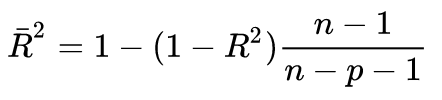

In [14]:
# Inputs: 
## R2: R-squared of a regression
## n: sample size
## p: total number of explanatory variables in the model

def adjusted_R2(R2, n, p):
    adj_R2 = 1 - (1 - R2) * ((n - 1) / (n - p - 1))
    return adj_R2

### i. **Recursive Feature Elimination**

In [15]:
from sklearn.feature_selection import RFE

**In the loops below, I will save the most relevant features for a certain number of selected features, for both collective and single-family dwellings**.

Furthermore, we create a list comprehension and *rfe.support_* in order to get a list of chosen feature names. 

- Note from ChatGPT about whether the order of the data in the Numpy concatenation when creating *standardized_vars_VC* corresponds to the order in the list *quant_variables_VC + dummy_variables*: when you concatenate the standardized quantitative variables with the dummy variables using *np.concatenate((quant_vars_scaler_VC, df_noBCN_VC[dummy_variables]), axis=1)*, the order of the columns in the resulting *standardized_vars_VC* array corresponds to the order of variables in the list *quant_variables_VC + dummy_variables*.
    So, when you later use this concatenated array in the RFE process and retrieve the feature names using the list comprehension, **the order is maintained**. The features in the resulting list *rfe_VC_features* will correspond to the order in which they appear in the concatenated array, which is the same order as in the list *quant_variables_VC + dummy_variables*.
- Note from ChatGPT of the *score* method after having performed RFE: For regression tasks, such as predicting a continuous variable like *log_ALQM2mes_LV_M_VC_21*, **the default scoring metric is the coefficient of determination (R^2)**. The R^2 score is a measure of how well the predicted values match the actual values. It ranges from 0 to 1, with 1 indicating perfect predictions and 0 indicating that the model is no better than predicting the mean of the target variable. See also https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression.score

Chosen VC features for 1 features: ['time_priv_trans']
RFE score (R^2) with the training data for 1 features: 0.25227892084441406
Chosen VC features for 2 features: ['time_priv_trans', 'superior_studies_rate']
RFE score (R^2) with the training data for 2 features: 0.5724432109596893
Chosen VC features for 3 features: ['time_priv_trans', 'superior_studies_rate', 'has_tram']
RFE score (R^2) with the training data for 3 features: 0.6148542977191617
Chosen VC features for 4 features: ['time_priv_trans', 'foreign_born_rate', 'superior_studies_rate', 'has_tram']
RFE score (R^2) with the training data for 4 features: 0.73359833041559
Chosen VC features for 5 features: ['time_priv_trans', 'foreign_born_rate', 'superior_studies_rate', 'log_avg_inc_hh', 'has_tram']
RFE score (R^2) with the training data for 5 features: 0.7418698631603338
Chosen VC features for 6 features: ['time_priv_trans', 'foreign_born_rate', 'superior_studies_rate', 'log_avg_inc_hh', 'has_tram', 'has_metro']
RFE score (R^2) 

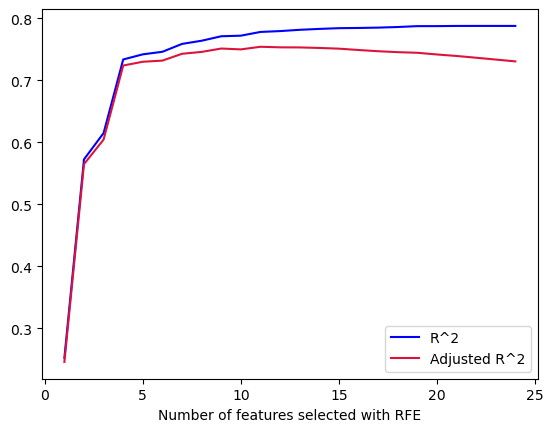

In [16]:
# COLLECTIVE DWELLINGS

## In these empty lists I will save the score of each regression and the adjusted R-squared
score_VC = []
adjusted_R_squared_VC = []

# I will perform RFE for 1 to 24 features (we have 24 explanatory variables overall)
for n in range(1, len(quant_variables_VC + dummy_variables) + 1):
    rfe_VC = RFE(mlr_VC, n_features_to_select = n)
    # We perform RFE for the explanatory and dependent variables
    rfe_VC.fit(standardized_vars_VC, df_noBCN_VC['log_ALQM2mes_LV_M_VC_21'])
    # We find the names of the features chosen by RFE
    rfe_VC_features = [f for (f, support) in zip(quant_variables_VC + dummy_variables, rfe_VC.support_) if support]

    # We store and append the score of the regression to the empty list score_VC
    R2 = rfe_VC.score(standardized_vars_VC, df_noBCN_VC['log_ALQM2mes_LV_M_VC_21'])
    score_VC.append(R2)
    # We append the adjusted R squared to the empty list adjusted_R_squared_VC
    adjusted_R_squared_VC.append(adjusted_R2(R2 = R2, n = len(df_noBCN_VC), p = n))
    
    # We print the desired results
    print('Chosen VC features for', n, 'features:', rfe_VC_features)
    print('RFE score (R^2) with the training data for', n, 'features:', rfe_VC.score(standardized_vars_VC, df_noBCN_VC['log_ALQM2mes_LV_M_VC_21']))

print('Highest adjusted R^2 is given for:', np.argmax(adjusted_R_squared_VC) + 1, 'features, with a a score of', np.max(adjusted_R_squared_VC))

plt.plot(list(range(1, len(quant_variables_VC + dummy_variables) + 1)), score_VC, color = 'blue')
plt.plot(list(range(1, len(quant_variables_VC + dummy_variables) + 1)), adjusted_R_squared_VC, color = 'crimson')
plt.legend(['R^2', 'Adjusted R^2'])
plt.xlabel('Number of features selected with RFE')
#plt.ylabel('Score of the linear regression')
#plt.title('Score of the linear regression for n selected features - collective dwellings')
plt.show()

Chosen VU features for 1 features: ['log_avg_inc_hh']
RFE score (R^2) with the training data for 1 features: 0.3962047511564716
Chosen VU features for 2 features: ['log_avg_inc_hh', 'has_metro']
RFE score (R^2) with the training data for 2 features: 0.4061676286940804
Chosen VU features for 3 features: ['log_avg_inc_hh', 'log_pop_density', 'has_metro']
RFE score (R^2) with the training data for 3 features: 0.5345180168789836
Chosen VU features for 4 features: ['log_avg_inc_hh', 'log_pop_density', 'has_tram', 'has_metro']
RFE score (R^2) with the training data for 4 features: 0.540011652429798
Chosen VU features for 5 features: ['str_line_dist', 'log_avg_inc_hh', 'log_pop_density', 'has_tram', 'has_metro']
RFE score (R^2) with the training data for 5 features: 0.5717201076689074
Chosen VU features for 6 features: ['str_line_dist', 'foreign_born_rate', 'log_avg_inc_hh', 'log_pop_density', 'has_tram', 'has_metro']
RFE score (R^2) with the training data for 6 features: 0.5993779548838769


Chosen VU features for 7 features: ['str_line_dist', 'foreign_born_rate', 'log_avg_inc_hh', 'log_pop_density', 'has_tram', 'has_metro', 'has_rodalies']
RFE score (R^2) with the training data for 7 features: 0.6068505896676719
Chosen VU features for 8 features: ['str_line_dist', 'ibi_urb', 'foreign_born_rate', 'log_avg_inc_hh', 'log_pop_density', 'has_tram', 'has_metro', 'has_rodalies']
RFE score (R^2) with the training data for 8 features: 0.6231562921543234
Chosen VU features for 9 features: ['str_line_dist', 'pt_lines', 'ibi_urb', 'foreign_born_rate', 'log_avg_inc_hh', 'log_pop_density', 'has_tram', 'has_metro', 'has_rodalies']
RFE score (R^2) with the training data for 9 features: 0.6284170150826303
Chosen VU features for 10 features: ['str_line_dist', 'pt_lines', 'ibi_urb', 'foreign_born_rate', 'mob_estud', 'log_avg_inc_hh', 'log_pop_density', 'has_tram', 'has_metro', 'has_rodalies']
RFE score (R^2) with the training data for 10 features: 0.644334106050088
Chosen VU features for 11

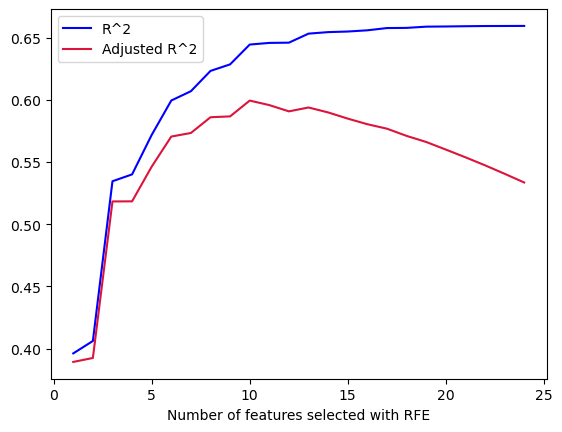

In [17]:
# SINGLE-FAMILY DWELLINGS

## In these empty lists I will save the score of each regression and the adjusted R-squared
score_VU = []
adjusted_R_squared_VU = []

for n in range(1, len(quant_variables_VU + dummy_variables) + 1):
    rfe_VU = RFE(mlr_VU, n_features_to_select = n)
    # We perform RFE for the explanatory and dependent variables
    rfe_VU.fit(standardized_vars_VU, df_noBCN_VU['log_ALQM2mes_LV_M_VU_21'])
    # We find the names of the features chosen by RFE
    rfe_VU_features = [f for (f, support) in zip(quant_variables_VU + dummy_variables, rfe_VU.support_) if support]
    
    # We store and append the score of the regression to the empty list score_VU
    R2 = rfe_VU.score(standardized_vars_VU, df_noBCN_VU['log_ALQM2mes_LV_M_VU_21'])
    score_VU.append(R2)
    # We append the adjusted R squared to the empty list adjusted_R_squared_VU
    adjusted_R_squared_VU.append(adjusted_R2(R2 = R2, n = len(df_noBCN_VU), p = n))

    # We print the desired results
    print('Chosen VU features for', n, 'features:', rfe_VU_features)
    print('RFE score (R^2) with the training data for', n, 'features:', rfe_VU.score(standardized_vars_VU, df_noBCN_VU['log_ALQM2mes_LV_M_VU_21']))

print('Highest adjusted R^2 is given for:', np.argmax(adjusted_R_squared_VU) + 1, 'features, with a a score of', np.max(adjusted_R_squared_VU))

plt.plot(list(range(1, len(quant_variables_VU + dummy_variables) + 1)), score_VU, color = 'blue')
plt.plot(list(range(1, len(quant_variables_VU + dummy_variables) + 1)), adjusted_R_squared_VU, color = 'crimson')
plt.legend(['R^2', 'Adjusted R^2'])
plt.xlabel('Number of features selected with RFE')
#plt.ylabel('Score of the linear regression')
#plt.title('Score of the linear regression for n selected features - single-family dwellings')
plt.show()

### ii. **Sequential Forward Floating Selection**

In [18]:
from mlxtend.feature_selection import SequentialFeatureSelector as SFS

Again, **the score that is saved by SFFS will be the R^2** ("If None (default), uses 'accuracy' for sklearn classifiers and 'r2' for sklearn regressors" - https://rasbt.github.io/mlxtend/api_subpackages/mlxtend.feature_selection/).

Features chosen after 1 features are added: ['time_priv_trans']
Features chosen after 2 features are added: ['time_priv_trans', 'superior_studies_rate']
Features chosen after 3 features are added: ['time_priv_trans', 'foreign_born_rate', 'superior_studies_rate']
Features chosen after 4 features are added: ['time_priv_trans', 'foreign_born_rate', 'superior_studies_rate', 'has_tram']
Features chosen after 5 features are added: ['time_priv_trans', 'foreign_born_rate', 'superior_studies_rate', 'log_avg_inc_hh', 'has_tram']
Features chosen after 6 features are added: ['time_priv_trans', 'foreign_born_rate', 'superior_studies_rate', 'log_avg_inc_hh', 'ratio_rented_houses_population', 'has_tram']
Features chosen after 7 features are added: ['time_priv_trans', 'foreign_born_rate', 'superior_studies_rate', 'population_growth', 'log_avg_inc_hh', 'ratio_rented_houses_population', 'has_tram']
Features chosen after 8 features are added: ['time_pub_trans', 'time_priv_trans', 'foreign_born_rate', 'su

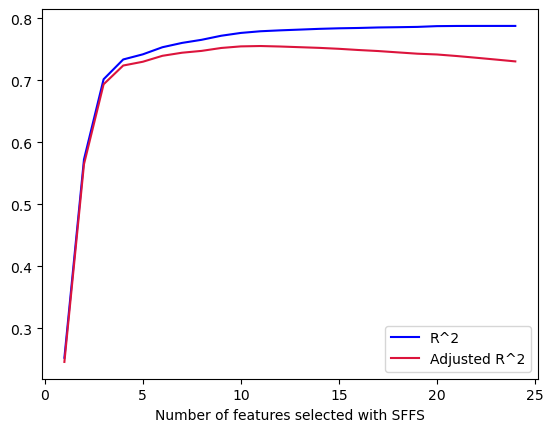

In [19]:
# COLLECTIVE DWELLINGS

## In these empty lists I will save the score of each regression and the adjusted R-squared
score_VC = []
adjusted_R_squared_VC = []

# Number of features to be added
n_features = len(quant_variables_VC + dummy_variables)

# I will perform SFFS for n features (we have 24 explanatory variables overall)
sffs_VC = SFS(mlr_VC, k_features = n_features, forward = True, floating = True, cv = 0)
# We perform SFFS for the explanatory and dependent variables
sffs_VC.fit(standardized_vars_VC, df_noBCN_VC['log_ALQM2mes_LV_M_VC_21'])

# Assuming quant_variables_VC + dummy_variables contains the original feature names
original_feature_names = quant_variables_VC + dummy_variables

# We find the names of the features chosen by SFFS after n features are added. Below, this for loop is explained by ChatGPT.
for n in range(1, n_features + 1):
    selected_feature_indices = sffs_VC.subsets_[n]['feature_names']
    selected_feature_names = [original_feature_names[int(index)] for index in selected_feature_indices]
    print('Features chosen after', n, 'features are added:', selected_feature_names) 

# We print and append the score after n features are added to the empty list score_VC
for n in range(1, n_features + 1):
    R2 = sffs_VC.subsets_[n]['avg_score']
    score_VC.append(R2)
    print('Score (R^2) of the model after', n, 'features are added:', sffs_VC.subsets_[n]['avg_score'])
    # We append the adjusted R squared to the empty list adjusted_R_squared_VC
    adjusted_R_squared_VC.append(adjusted_R2(R2 = R2, n = len(df_noBCN_VC), p = n))

print('Highest adjusted R^2 is given for:', np.argmax(adjusted_R_squared_VC) + 1, 'features, with a a score of', np.max(adjusted_R_squared_VC))

plt.plot(list(range(1, n_features + 1)), score_VC, color = 'blue')
plt.plot(list(range(1, n_features + 1)), adjusted_R_squared_VC, color = 'crimson')
plt.legend(['R^2', 'Adjusted R^2'])
plt.xlabel('Number of features selected with SFFS')
#plt.ylabel('Score of the linear regression')
#plt.title('Score of the linear regression for n selected features - collective dwellings')
plt.show()

Explanation by ChatGPT of the for loop above for extracting the names of the chosen features:
- Let's break down the second line within the loop: 
    *selected_feature_indices = sffs_VC.subsets_[n]['feature_names']*

    In this line, *sffs_VC.subsets_[n]['feature_names']* is retrieving the feature names associated with the current subset after adding n features. This appears to be stored as a tuple of strings, where each string represents an index.
- Now, let's break down the list comprehension in the next line:
    *selected_feature_names = [original_feature_names[int(index)] for index in selected_feature_indices]*

    - *original_feature_names[int(index)]*: This part is taking each index from selected_feature_indices and converting it to an integer (*int(index)*).

    - f*or index in selected_feature_indices*: This part is iterating over each index in selected_feature_indices, which is the list of indices obtained from the current subset.

    - The entire list comprehension creates a new list *selected_feature_names* where each element is the corresponding feature name retrieved from *original_feature_names* using the adjusted index.

In summary, this line is mapping the indices obtained from the feature selection process to the actual feature names in your original list original_feature_names. It ensures that the feature names are correctly matched with the selected indices.

Features chosen after 1 features are added: ['log_avg_inc_hh']
Features chosen after 2 features are added: ['log_avg_inc_hh', 'log_pop_density']
Features chosen after 3 features are added: ['log_avg_inc_hh', 'log_pop_density', 'has_metro']
Features chosen after 4 features are added: ['foreign_born_rate', 'log_avg_inc_hh', 'log_pop_density', 'has_metro']
Features chosen after 5 features are added: ['str_line_dist', 'foreign_born_rate', 'log_avg_inc_hh', 'log_pop_density', 'has_metro']
Features chosen after 6 features are added: ['str_line_dist', 'foreign_born_rate', 'log_avg_inc_hh', 'log_pop_density', 'has_tram', 'has_metro']
Features chosen after 7 features are added: ['str_line_dist', 'ibi_urb', 'foreign_born_rate', 'log_avg_inc_hh', 'log_pop_density', 'has_tram', 'has_metro']
Features chosen after 8 features are added: ['str_line_dist', 'ibi_urb', 'foreign_born_rate', 'log_avg_inc_hh', 'log_pop_density', 'has_tram', 'has_metro', 'has_rodalies']
Features chosen after 9 features are a

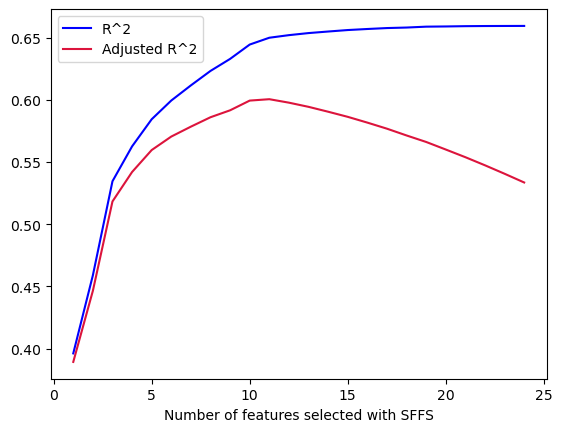

In [20]:
# SINGLE-FAMILY DWELLINGS

## In these empty lists I will save the score of each regression and the adjusted R-squared
score_VU = []
adjusted_R_squared_VU = []

# Number of features to be added
n_features = len(quant_variables_VU + dummy_variables)

# I will perform SFFS for n features (we have 24 explanatory variables overall)
sffs_VU = SFS(mlr_VU, k_features = n_features, forward = True, floating = True, cv = 0)
# We perform SFFS for the explanatory and dependent variables
sffs_VU.fit(standardized_vars_VU, df_noBCN_VU['log_ALQM2mes_LV_M_VU_21'])

# Assuming quant_variables_VU + dummy_variables contains the original feature names
original_feature_names = quant_variables_VU + dummy_variables

# We find the names of the features chosen by SFFS after n features are added. Below, this for loop is explained by ChatGPT.
for n in range(1, n_features + 1):
    selected_feature_indices = sffs_VU.subsets_[n]['feature_names']
    selected_feature_names = [original_feature_names[int(index)] for index in selected_feature_indices]
    print('Features chosen after', n, 'features are added:', selected_feature_names) 

# We print and append the score after n features are added to the empty list score_VU
for n in range(1, n_features + 1):
    R2 = sffs_VU.subsets_[n]['avg_score']
    score_VU.append(R2)
    print('Score (R^2) of the model after', n, 'features are added:', sffs_VU.subsets_[n]['avg_score'])
    # We append the adjusted R squared to the empty list adjusted_R_squared_VU
    adjusted_R_squared_VU.append(adjusted_R2(R2 = R2, n = len(df_noBCN_VU), p = n))

print('Highest adjusted R^2 is given for:', np.argmax(adjusted_R_squared_VU) + 1, 'features, with a a score of', np.max(adjusted_R_squared_VU))

plt.plot(list(range(1, n_features + 1)), score_VU, color = 'blue')
plt.plot(list(range(1, n_features + 1)), adjusted_R_squared_VU, color = 'crimson')
plt.legend(['R^2', 'Adjusted R^2'])
plt.xlabel('Number of features selected with SFFS')
#plt.ylabel('Score of the linear regression')
#plt.title('Score of the linear regression for n selected features - single-family dwellings')
plt.show()

### iii. **Sequential Backward Floating Selection**

Features chosen after 0 features are subtracted: ['time_pub_trans', 'time_priv_trans', 'str_line_dist', 'parks_surface', 'pt_lines', 'ibi_urb', 'ibi_rur', 'vpo', 'foreign_born_rate', 'superior_studies_rate', 'unemployment_rate', 'industrial_waste', 'population_growth', 'new_houses', 'mob_estud', 'log_avg_inc_hh', 'log_pop_density', 'ratio_rented_houses_population', 'has_beach', 'has_parks', 'has_tram', 'has_metro', 'has_rodalies', 'has_fgc']
Features chosen after 1 features are subtracted: ['time_pub_trans', 'time_priv_trans', 'str_line_dist', 'pt_lines', 'ibi_urb', 'ibi_rur', 'vpo', 'foreign_born_rate', 'superior_studies_rate', 'unemployment_rate', 'industrial_waste', 'population_growth', 'new_houses', 'mob_estud', 'log_avg_inc_hh', 'log_pop_density', 'ratio_rented_houses_population', 'has_beach', 'has_parks', 'has_tram', 'has_metro', 'has_rodalies', 'has_fgc']
Features chosen after 2 features are subtracted: ['time_pub_trans', 'time_priv_trans', 'str_line_dist', 'pt_lines', 'ibi_urb'

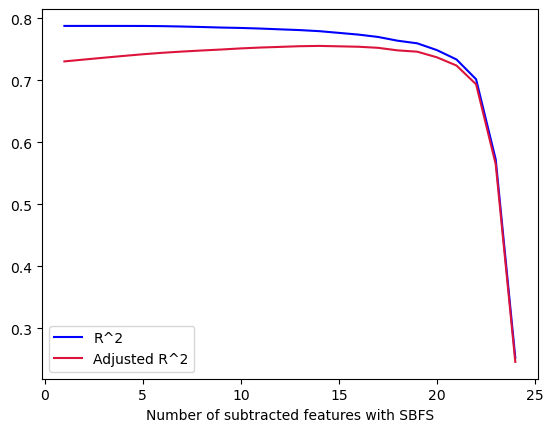

In [21]:
# COLLECTIVE DWELLINGS

## In these empty lists I will save the score of each regression and the adjusted R-squared
score_VC = []
adjusted_R_squared_VC = []

# Number of features to remain after SBFS
n_features = 1

# I will perform SBFS for 1 feature (i.e., we will remove all the variables until we only keep 1)
sbfs_VC = SFS(mlr_VC, k_features = n_features, forward = False, floating = True, cv = 0)
# We perform SBFS for the explanatory and dependent variables
sbfs_VC.fit(standardized_vars_VC, df_noBCN_VC['log_ALQM2mes_LV_M_VC_21'])

# Assuming quant_variables_VC + dummy_variables contains the original feature names
original_feature_names = quant_variables_VC + dummy_variables

# We find the names of the features chosen by SBFS after n features are subtracted.
for n in sbfs_VC.subsets_:
    selected_feature_indices = sbfs_VC.subsets_[n]['feature_names']
    selected_feature_names = [original_feature_names[int(index)] for index in selected_feature_indices]
    print('Features chosen after', len(quant_variables_VC + dummy_variables) - n, 'features are subtracted:', selected_feature_names) 

# We print and append the score after n features are added to the empty list score_VC
for n in sbfs_VC.subsets_:
    R2 = sbfs_VC.subsets_[n]['avg_score']
    score_VC.append(R2)
    print('Score (R^2) of the model after', len(quant_variables_VC + dummy_variables) - n, 'features are subtracted:', sbfs_VC.subsets_[n]['avg_score'])
    # We append the adjusted R squared to the empty list adjusted_R_squared_VC
    adjusted_R_squared_VC.append(adjusted_R2(R2 = R2, n = len(df_noBCN_VC), p = n))

# We reverse the order of score_VC and adjusted_R_squared_VC
score_VC = score_VC[::-1]
adjusted_R_squared_VC = adjusted_R_squared_VC[::-1]

print('Highest adjusted R^2 is given for:', (np.argmax(adjusted_R_squared_VC) + 1), 'features, with a a score of', np.max(adjusted_R_squared_VC))

plt.plot(list(range(len(quant_variables_VC + dummy_variables), 0, -1)), score_VC, color = 'blue')
plt.plot(list(range(len(quant_variables_VC + dummy_variables), 0, -1)), adjusted_R_squared_VC, color = 'crimson')
plt.legend(['R^2', 'Adjusted R^2'])
plt.xlabel('Number of subtracted features with SBFS')
#plt.ylabel('Score of the linear regression')
#plt.title('Score of the linear regression for n subtracted features - collective dwellings')
plt.show()

Features chosen after 0 features are subtracted: ['time_pub_trans', 'time_priv_trans', 'str_line_dist', 'parks_surface', 'pt_lines', 'ibi_urb', 'ibi_rur', 'vpo', 'foreign_born_rate', 'superior_studies_rate', 'unemployment_rate', 'industrial_waste', 'population_growth', 'new_houses', 'mob_estud', 'log_avg_inc_hh', 'log_pop_density', 'ratio_rented_houses_population', 'has_beach', 'has_parks', 'has_tram', 'has_metro', 'has_rodalies', 'has_fgc']
Features chosen after 1 features are subtracted: ['time_pub_trans', 'time_priv_trans', 'str_line_dist', 'parks_surface', 'pt_lines', 'ibi_urb', 'ibi_rur', 'vpo', 'foreign_born_rate', 'superior_studies_rate', 'unemployment_rate', 'industrial_waste', 'population_growth', 'new_houses', 'mob_estud', 'log_avg_inc_hh', 'log_pop_density', 'ratio_rented_houses_population', 'has_beach', 'has_parks', 'has_tram', 'has_metro', 'has_rodalies']
Features chosen after 2 features are subtracted: ['time_pub_trans', 'time_priv_trans', 'str_line_dist', 'pt_lines', 'ib

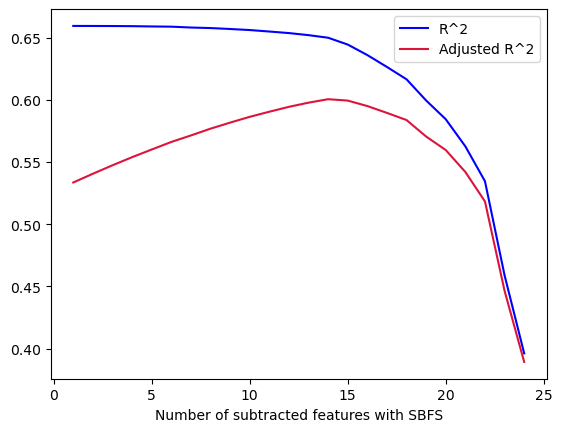

In [22]:
# SINGLE-FAMILY DWELLINGS

## In these empty lists I will save the score of each regression and the adjusted R-squared
score_VU = []
adjusted_R_squared_VU = []

# Number of features to remain after SBFS
n_features = 1

# I will perform SBFS for 1 feature (i.e., we will remove all the variables until we only keep 1)
sbfs_VU = SFS(mlr_VU, k_features = n_features, forward = False, floating = True, cv = 0)
# We perform SBFS for the explanatory and dependent variables
sbfs_VU.fit(standardized_vars_VU, df_noBCN_VU['log_ALQM2mes_LV_M_VU_21'])

# Assuming quant_variables_VU + dummy_variables contains the original feature names
original_feature_names = quant_variables_VU + dummy_variables

# We find the names of the features chosen by SBFS after n features are subtracted.
for n in sbfs_VU.subsets_:
    selected_feature_indices = sbfs_VU.subsets_[n]['feature_names']
    selected_feature_names = [original_feature_names[int(index)] for index in selected_feature_indices]
    print('Features chosen after', len(quant_variables_VU + dummy_variables) - n, 'features are subtracted:', selected_feature_names) 

# We print and append the score after n features are added to the empty list score_VU
for n in sbfs_VU.subsets_:
    R2 = sbfs_VU.subsets_[n]['avg_score']
    score_VU.append(R2)
    print('Score (R^2) of the model after', len(quant_variables_VU + dummy_variables) - n, 'features are subtracted:', sbfs_VU.subsets_[n]['avg_score'])
    # We append the adjusted R squared to the empty list adjusted_R_squared_VU
    adjusted_R_squared_VU.append(adjusted_R2(R2 = R2, n = len(df_noBCN_VU), p = n))

# We reverse the order of score_VU and adjusted_R_squared_VU
score_VU = score_VU[::-1]
adjusted_R_squared_VU = adjusted_R_squared_VU[::-1]

print('Highest adjusted R^2 is given for:', (np.argmax(adjusted_R_squared_VU) + 1), 'features, with a a score of', np.max(adjusted_R_squared_VU))

plt.plot(list(range(len(quant_variables_VU + dummy_variables), 0, -1)), score_VU, color = 'blue')
plt.plot(list(range(len(quant_variables_VU + dummy_variables), 0, -1)), adjusted_R_squared_VU, color = 'crimson')
plt.legend(['R^2', 'Adjusted R^2'])
plt.xlabel('Number of subtracted features with SBFS')
#plt.ylabel('Score of the linear regression')
#plt.title('Score of the linear regression for n subtracted features - single-family dwellings')
plt.show()

### iv. **Regressions with the results from the wrapper methods**

Below I will make the regressions with the variables that have given the highest adjusted R-squared for each wrapper method.

##### *For collective dwellings*

In [23]:
print('\n Results with the features from Recursive Feature Elimination:\n ')
lr(y = 'log_ALQM2mes_LV_M_VC_21', x = ['time_pub_trans', 'time_priv_trans', 'foreign_born_rate', 'superior_studies_rate', 'population_growth', 'log_avg_inc_hh', 'log_pop_density', 'ratio_rented_houses_population', 'has_tram', 'has_metro', 'has_fgc'], df = df_noBCN_VC)

print('\n Results with the features from Sequential Forward Floating Selection:\n ')
lr(y = 'log_ALQM2mes_LV_M_VC_21', x = ['time_pub_trans', 'time_priv_trans', 'pt_lines', 'foreign_born_rate', 'superior_studies_rate', 'population_growth', 'log_avg_inc_hh', 'log_pop_density', 'ratio_rented_houses_population', 'has_tram', 'has_metro'], df = df_noBCN_VC)

# Chosen model
print('\n Results with the features from Sequential Backward Floating Selection:\n ')
lr(y = 'log_ALQM2mes_LV_M_VC_21', x = ['time_pub_trans', 'time_priv_trans', 'parks_surface', 'foreign_born_rate', 'unemployment_rate', 'population_growth', 'log_avg_inc_hh', 'log_pop_density', 'ratio_rented_houses_population', 'has_tram', 'has_metro'], df = df_noBCN_VC)


 Results with the features from Recursive Feature Elimination:
 
                               OLS Regression Results                              
Dep. Variable:     log_ALQM2mes_LV_M_VC_21   R-squared:                       0.778
Model:                                 OLS   Adj. R-squared:                  0.754
Method:                      Least Squares   F-statistic:                     21.65
Date:                     Tue, 28 Nov 2023   Prob (F-statistic):           5.16e-22
Time:                             16:49:27   Log-Likelihood:                 136.87
No. Observations:                      114   AIC:                            -249.7
Df Residuals:                          102   BIC:                            -216.9
Df Model:                               11                                         
Covariance Type:                       HC3                                         
                                     coef    std err          z      P>|z|      [0.025      0.

##### *For single-family dwellings*

In [24]:
print('\n Results with the features from Recursive Feature Elimination:\n ')
lr(y = 'log_ALQM2mes_LV_M_VU_21', x = ['str_line_dist', 'pt_lines', 'ibi_urb', 'foreign_born_rate', 'mob_estud', 'log_avg_inc_hh', 'log_pop_density', 'has_tram', 'has_metro', 'has_rodalies'], df = df_noBCN_VU)

print('\n Results with the features from Sequential Forward Floating Selection:\n ')
lr(y = 'log_ALQM2mes_LV_M_VU_21', x = ['str_line_dist', 'pt_lines', 'ibi_urb', 'foreign_born_rate', 'new_houses', 'mob_estud', 'log_avg_inc_hh', 'log_pop_density', 'has_tram', 'has_metro', 'has_rodalies'], df = df_noBCN_VU)

# Chosen model
print('\n Results with the features from Sequential Backward Floating Selection:\n ')
lr(y = 'log_ALQM2mes_LV_M_VU_21', x = ['str_line_dist', 'pt_lines', 'ibi_urb', 'foreign_born_rate', 'new_houses', 'mob_estud', 'log_avg_inc_hh', 'log_pop_density', 'has_tram', 'has_metro', 'has_rodalies'], df = df_noBCN_VU)


 Results with the features from Recursive Feature Elimination:
 
                               OLS Regression Results                              
Dep. Variable:     log_ALQM2mes_LV_M_VU_21   R-squared:                       0.644
Model:                                 OLS   Adj. R-squared:                  0.599
Method:                      Least Squares   F-statistic:                     16.43
Date:                     Tue, 28 Nov 2023   Prob (F-statistic):           1.43e-15
Time:                             16:49:28   Log-Likelihood:                 21.739
No. Observations:                       90   AIC:                            -21.48
Df Residuals:                           79   BIC:                             6.021
Df Model:                               10                                         
Covariance Type:                       HC3                                         
                        coef    std err          z      P>|z|      [0.025      0.975]
--------

# 4. Checking OLS assumptions
For the chosen models, I will check below if the normality assumption (residuals are normally distributed) is satisfied or not.

First, I will modify the linear regression function so that the results are not directly printed.

In [33]:
import matplotlib.pyplot as plt
from scipy.stats import skewtest

In [34]:
# Función para hacer una regresión con los heteroskedasticity-robust standard errors
# Inputs:
## y = dependent variable
## x = list of explanatory variables
## df = DataFrame used for the regression

def lr_mod(y, x, df):
    # Specify 'y' and 'x' directly in the OLS constructor
    X = sm.add_constant(df[x])  # Adding a constant term to the predictor
    model = sm.OLS(df[y], X)
    results = model.fit(cov_type='HC3')

    # Now we save the fitted values
    fitted_values = results.predict(X)

    # Now we save the residuals
    residuals = df[y] - fitted_values

    # Finally, we plot the residuals
    plt.hist(residuals)
    plt.show()

    # And check, formally, whether the distribution is normal or not
    statistic, pvalue = skewtest(residuals)
    if pvalue < 0.05:
        print('The distribution is not normal. pvalue equal to:', pvalue)
    else:
        print('The distribution is normal. pvalue equal to:', pvalue)

##### *For collective dwellings*

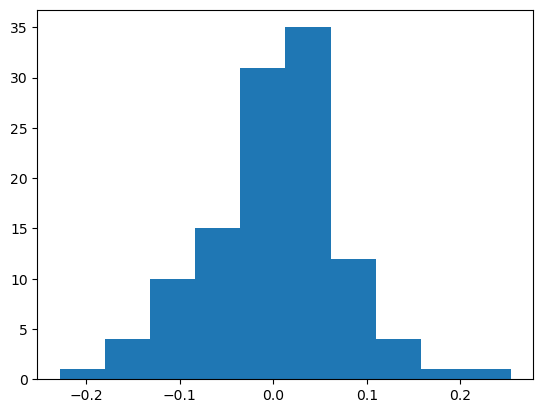

The distribution is normal. pvalue equal to: 0.9156347120306205


In [35]:
lr_mod(y = 'log_ALQM2mes_LV_M_VC_21', x = ['time_pub_trans', 'time_priv_trans', 'parks_surface', 'foreign_born_rate', 'unemployment_rate', 'population_growth', 'log_avg_inc_hh', 'log_pop_density', 'ratio_rented_houses_population', 'has_tram', 'has_metro'], df = df_noBCN_VC)

More or less, the normality assumption is satisfied for the model for collective dwellings.

##### *For single-family dwellings*

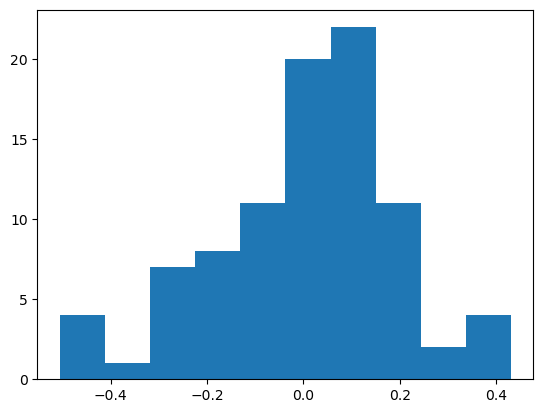

The distribution is normal. pvalue equal to: 0.06562746526107889


In [36]:
lr_mod(y = 'log_ALQM2mes_LV_M_VU_21', x = ['str_line_dist', 'pt_lines', 'ibi_urb', 'foreign_born_rate', 'new_houses', 'mob_estud', 'log_avg_inc_hh', 'log_pop_density', 'has_tram', 'has_metro', 'has_rodalies'], df = df_noBCN_VU)

This is less similar to a normal distribution.